# Intro to coordinate transformations

## Cartesians & Spherical Polars 

In [1]:
import sympy
from sympy.vector import *
from IPython.display import Math
sympy.init_printing(use_unicode=True)

In [2]:
import numpy as np
g = np.linspace(-10,10,400)
xg, yg = np.meshgrid(g, g)
zg = 0

In [3]:
x_smb, y_smb, z_smb = sympy.symbols('x y z', positive = True, real = True)
theta_smb, phi_smb = sympy.symbols('theta phi', real = True)
r_smb = sympy.symbols('r', positive = True, real = True)


x = r_smb * sympy.sin(theta_smb) * sympy.cos(phi_smb)
y = r_smb * sympy.sin(theta_smb) * sympy.sin(phi_smb)
z = r_smb * sympy.cos(theta_smb)

r = sympy.sqrt(x_smb**2+y_smb**2+z_smb**2)
theta = sympy.atan(sympy.sqrt(x_smb**2+y_smb**2)/z_smb)
phi = sympy.atan(y_smb/x_smb)

cart = sympy.Matrix([x,y,z])

sph = sympy.Matrix([r,theta,phi])


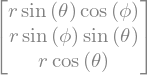

In [4]:
cart

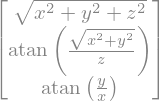

In [5]:
sph

## Transformation matrices

$x^i=\{x, y, z\}$ ; $x^{i'}=\{r, \theta, \phi\}$

$\Lambda^{i}_{i'} = \frac{\partial x^i}{\partial x^{i'}}$ ; $\Lambda^{i'}_{i} = \frac{\partial x^{i'}}{\partial x^i}$

In [6]:
# Jacobian vectors

diff_op_vec_polar = sympy.Matrix([[r_smb, theta_smb, phi_smb]])
diff_op_vec_cart = sympy.Matrix([[x_smb, y_smb, z_smb]])

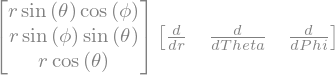

In [7]:
operation_vector = sympy.Matrix([['d/dr','d/dTheta', 'd/dPhi']])
sympy.MatMul(cart,operation_vector)

In [8]:
Lambda1_rtp = cart.jacobian(diff_op_vec_polar)

Lam_smb = sympy.symbols("Lambda^\i_i\'")
display(Math('\Lambda^i_j = '+sympy.latex(Lambda1_rtp)))

Lambda1_xyz = Lambda1_rtp.subs([(r_smb, r),
                                (theta_smb, theta),
                                (phi_smb, phi)])
Lambda1_xyz = Lambda1_xyz.applyfunc(sympy.simplify)
Lambda1_xyz = Lambda1_xyz.subs([(r, r_smb),])

display(Math('\Lambda^i_j = '+sympy.latex(Lambda1_xyz)))

# i = i, i' = j

<IPython.core.display.Math object>

<IPython.core.display.Math object>

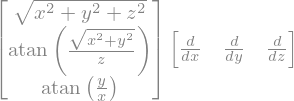

In [9]:
operation_vector1 = sympy.Matrix([['d/dx','d/dy', 'd/dz']])
sympy.MatMul(sph,operation_vector1)

In [10]:
Lambda2_xyz = sympy.simplify(sph.jacobian(diff_op_vec_cart))
Lambda2_xyz = Lambda2_xyz.subs([(x_smb**2+y_smb**2+z_smb**2, r_smb**2)])
Lambda2_xyz = Lambda2_xyz.applyfunc(sympy.simplify)


Lam_smb = sympy.symbols("Lambda^\i_i\'")
display(Math('\Lambda^j_i = '+sympy.latex(Lambda2_xyz)))


Lambda2_rtp = Lambda2_xyz.subs([(x_smb, x),
                                (y_smb, y),
                                (z_smb, z)])
Lambda2_rtp = Lambda2_rtp.applyfunc(sympy.simplify)

display(Math('\Lambda^j_i = '+sympy.latex(Lambda2_rtp)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

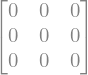

In [11]:
tot = Lambda1_xyz - sympy.Inverse(Lambda2_xyz)
tot_r =tot.subs(r_smb,sympy.sqrt(x_smb**2+y_smb**2+z_smb**2))
tot_r.simplify()

Equals to 0 3x3 matrix => the transformation matrices are inverse of each other

$\Lambda^{i}_{i'} \Lambda^{i'}_{j} = \delta^{i}_{j}$

## Metric tensor

Metric tensor in cartesian coordinates: $g_{ij} = \delta_{ij}$

$[g_{i'j'}] = \Lambda^T I \Lambda$

$[g^{i'j'}] = \Lambda^{-1} I (\Lambda^{-1})^T$

In [12]:
_ = sympy.simplify(sympy.MatMul(sympy.Transpose(Lambda1_xyz), sympy.Identity(3), Lambda1_xyz))

display(Math("g_{ij} = "+sympy.latex(_)))

<IPython.core.display.Math object>

In [13]:
_ = sympy.simplify(sympy.MatMul(sympy.Inverse(Lambda1_xyz), sympy.Identity(3), sympy.Transpose(sympy.Inverse(Lambda1_xyz))))

display(Math("g^{ij} = "+sympy.latex(_)))

<IPython.core.display.Math object>

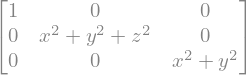

In [14]:
g_ij = sympy.Transpose(Lambda1_xyz) * sympy.Identity(3) * Lambda1_xyz
g_ij = sympy.simplify(g_ij).subs(r_smb, sympy.sqrt(x_smb**2+y_smb**2+z_smb**2))
g_ij 

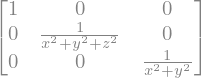

In [15]:
gij = sympy.Inverse(Lambda1_xyz) * sympy.Identity(3) * sympy.Transpose(sympy.Inverse(Lambda1_xyz))
gij = sympy.simplify(gij).subs(r_smb, sympy.sqrt(x_smb**2+y_smb**2+z_smb**2))
gij

# Permittivity in physical space

In [16]:
sqrt_det_g = sympy.simplify(sympy.sqrt(sympy.det(g_ij)))
sqrt_det_g

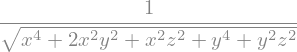

In [17]:
sqrt_det_gij = sympy.simplify(sympy.sqrt(sympy.det(gij)))
sqrt_det_gij

$\mu^{ij} = \epsilon^{ij} = \sqrt{g} g^{ij}$

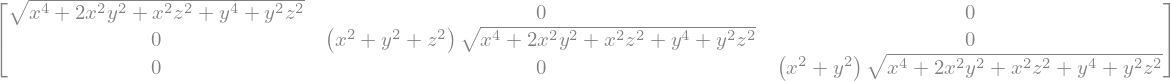

In [18]:
E_ij = sqrt_det_g * g_ij
E_ij

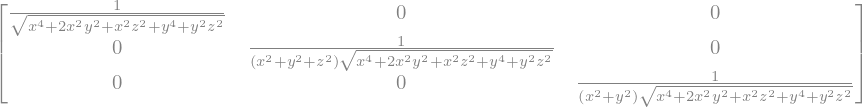

In [19]:
Eij = sqrt_det_gij * gij
Eij

In [20]:
E_00 = E_ij[0,0]
E_11 = E_ij[1,1]
E_22 = E_ij[2,2]

display(Math('$\epsilon_{} = {}$'.format(0,sympy.latex(E_ij[0,0]))))
display(Math('$\epsilon_{} = {}$'.format(1,sympy.latex(E_ij[1,1]))))
display(Math('$\epsilon_{} = {}$'.format(2,sympy.latex(E_ij[2,2]))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [21]:
E00 = Eij[0,0]
E11 = Eij[1,1]
E22 = Eij[2,2]

display(Math('$\epsilon^{} = {}$'.format(0,sympy.latex(Eij[0,0]))))
display(Math('$\epsilon^{} = {}$'.format(1,sympy.latex(Eij[1,1]))))
display(Math('$\epsilon^{} = {}$'.format(2,sympy.latex(Eij[2,2]))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [22]:
E_00 = E_00.subs(x_smb,sympy.symbols('(xg)'))
E_00 = E_00.subs(y_smb,sympy.symbols('(yg)'))
E_00 = E_00.subs(z_smb,sympy.symbols('(zg)'))

E_11 = E_11.subs(x_smb,sympy.symbols('(xg)'))
E_11 = E_11.subs(y_smb,sympy.symbols('(yg)'))
E_11 = E_11.subs(z_smb,sympy.symbols('(zg)'))

E_22 = E_22.subs(x_smb,sympy.symbols('(xg)'))
E_22 = E_22.subs(y_smb,sympy.symbols('(yg)'))
E_22 = E_22.subs(z_smb,sympy.symbols('(zg)'))


E00 = E00.subs(x_smb,sympy.symbols('(xg)'))
E00 = E00.subs(y_smb,sympy.symbols('(yg)'))
E00 = E00.subs(z_smb,sympy.symbols('(zg)'))

E11 = E11.subs(x_smb,sympy.symbols('(xg)'))
E11 = E11.subs(y_smb,sympy.symbols('(yg)'))
E11 = E11.subs(z_smb,sympy.symbols('(zg)'))

E22 = E22.subs(x_smb,sympy.symbols('(xg)'))
E22 = E22.subs(y_smb,sympy.symbols('(yg)'))
E22 = E22.subs(z_smb,sympy.symbols('(zg)'))

In [23]:
from numpy import *

E_00_intensity_map = eval(str(E_00))
E_11_intensity_map = eval(str(E_11))
E_22_intensity_map = eval(str(E_22))

E00_intensity_map = eval(str(E00))
E11_intensity_map = eval(str(E11))
E22_intensity_map = eval(str(E22))

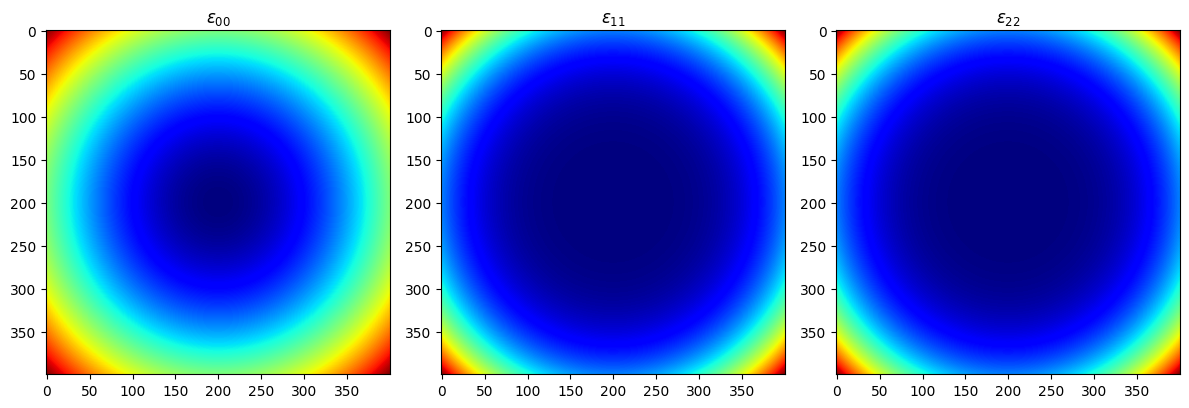

In [24]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (12,16))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(E_00_intensity_map,cmap='jet')
ax1.set_title(r'$\epsilon_{00}$')
ax2.imshow(E_11_intensity_map,cmap='jet')
ax2.set_title(r'$\epsilon_{11}$')
ax3.imshow(E_22_intensity_map,cmap='jet')
ax3.set_title(r'$\epsilon_{22}$')


plt.tight_layout()


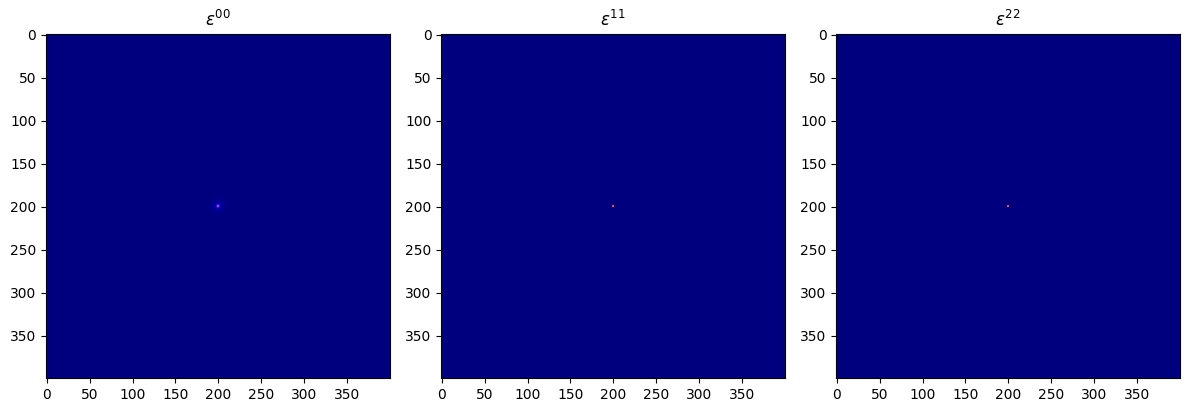

In [25]:
fig = plt.figure(figsize = (12,16))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(E00_intensity_map,cmap='jet')
ax1.set_title(r'$\epsilon^{00}$')
ax2.imshow(E11_intensity_map,cmap='jet')
ax2.set_title(r'$\epsilon^{11}$')
ax3.imshow(E22_intensity_map,cmap='jet')
ax3.set_title(r'$\epsilon^{22}$')


plt.tight_layout()

Can see that the permittivity intensity components are represented by a point source. This is liekly because I just went from Cartesians to Polars via coordinate transformation $\left(\{x,y\} \rightarrow \{r, \theta \} \right)$, however I never introduced transformation $\{r, \theta \} \rightarrow \{r', \theta'\}$, where we would transform $r$ leaving $\theta$ unchanged to allow for sample radius of the specimen.

Try changing $r$ now.

## Circular Base Cylinder

In [26]:
# r = u ; theta = nu

x_cyl = r_smb * sympy.cos(theta_smb)
y_cyl = r_smb * sympy.sin(theta_smb)
z_cyl = z_smb

define spatial metric

In [27]:
x_unit = sympy.symbols('\hat{x}')
y_unit = sympy.symbols('\hat{y}')
z_unit = sympy.symbols('\hat{z}')


# position vector

p = (x_cyl)*x_unit + (y_cyl)*y_unit + (z_cyl)*z_unit
p

In [28]:
dp_dr = sympy.diff(p, r_smb)
dp_dtheta = sympy.diff(p,theta_smb)
dp_dz = sympy.diff(p, z_smb)

display(Math(r'$\frac{\partial \vec{p}}{\partial r} = '+sympy.latex(dp_dr)))
display(Math(r'$\frac{\partial \vec{p}}{\partial \theta} = '+sympy.latex(dp_dtheta)))
display(Math(r'$\frac{\partial \vec{p}}{\partial z} = '+sympy.latex(dp_dz)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [29]:
def vec_components(vector):
    vec_i_comp = sympy.diff(vector, sympy.symbols('\hat{x}'))
    vec_j_comp = sympy.diff(vector, sympy.symbols('\hat{y}'))
    vec_k_comp = sympy.diff(vector, sympy.symbols('\hat{z}'))

    return vec_i_comp, vec_j_comp, vec_k_comp

In [30]:
dp_dr_i, dp_dr_j, dp_dr_k = vec_components(dp_dr)
dp_dtheta_i, dp_dtheta_j, dp_dtheta_k = vec_components(dp_dtheta)
dp_dz_i, dp_dz_j, dp_dz_k = vec_components(dp_dz)


In [31]:
dp_dr_mag = sympy.simplify(sympy.sqrt(dp_dr_i**2 + dp_dr_j**2 + dp_dr_k**2))
dp_dtheta_mag = sympy.simplify(sympy.sqrt(dp_dtheta_i**2 + dp_dtheta_j**2 + dp_dtheta_k**2))
dp_dz_mag = sympy.simplify(sympy.sqrt(dp_dz_i**2 + dp_dz_j**2 + dp_dz_k**2))

In [32]:
display(Math(r'$\left|\frac{\partial \vec{p}}{\partial r}\right| = '+sympy.latex(dp_dr_mag)))
display(Math(r'$\left|\frac{\partial \vec{p}}{\partial \theta}\right| = '+sympy.latex(dp_dtheta_mag)))
display(Math(r'$\left|\frac{\partial \vec{p}}{\partial z}\right| = '+sympy.latex(dp_dz_mag)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [33]:
# => spatial metric is:

gamma_ij = sympy.zeros(3)
gamma_ij[0,0] = dp_dr_mag**2
gamma_ij[1,1] = dp_dtheta_mag**2
gamma_ij[2,2] = dp_dz_mag**2

display(Math(r'$ds^2 = \gamma_{11}(dx^1)^2 + \gamma_{22}(dx^2)^2 + \gamma_{33}(dx^3)^2'))
display(Math(r'$ds^2 = \gamma_{11}(dx^1)^2 + \gamma_{22}(dx^2)^2 + \gamma_{33}(dx^3)^2'))
display(Math(r'$[\gamma_{ij}] = '+sympy.latex(gamma_ij)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

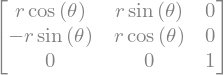

In [34]:
# can we get that using the matrix notation?

cosine = sympy.cos(theta_smb)

Lambda_cyl = sympy.Matrix([[r_smb * sympy.cos(theta_smb),r_smb * (sympy.sin(theta_smb)),0],[r_smb * (-sympy.sin(theta_smb)),r_smb * sympy.cos(theta_smb),0],[0,0,1]])
xyz = sympy.Matrix([[x_smb],[y_smb],[z_smb]])


Lambda_cyl

$[g_{i'j'}] = \Lambda^T I \Lambda$

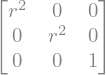

In [35]:
sympy.simplify(sympy.Transpose(Lambda_cyl) * sympy.eye(3) * Lambda_cyl)

Messed up somewhere ??????????

Anyway, proceed with the $[\gamma_{ij}]$ from above

In [36]:
gamma_det = sympy.det(gamma_ij)

display(Math(r'$\gamma = det(\gamma_{ij}) = '+sympy.latex(gamma_det)))

<IPython.core.display.Math object>

Consider invisibility shell with an object hidden within it.

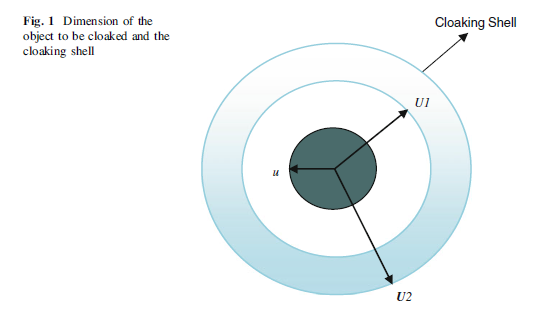

U1 = $R_1$, the radius of object

U2 = $R_2$, the radius of cloaking shell

Transform the radius, $r \rightarrow r'$

In [37]:
R1, R2 = sympy.symbols('R_1 R_2')

r_prime = R1 + (R2-R1)/(R2)*r_smb
theta_prime = theta_smb
z_prime = z_smb

display(Math(r'r^{\prime} = '+sympy.latex(r_prime)))
display(Math(r'\theta^{\prime} = '+sympy.latex(theta_prime)))
display(Math(r'z^{\prime} = '+sympy.latex(z_prime)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [38]:
drpr_dr = r_prime.diff(r_smb)
display(Math(r'\frac{\partial r^{\prime}}{\partial r} = '+sympy.latex(drpr_dr)))

<IPython.core.display.Math object>

$g_{i'j'} = \frac{\partial x^i}{\partial x^{i^\prime}} \frac{\partial x^j}{\partial x^{j^\prime}} \gamma_{ij}$

$g^{i'j'} = \frac{\partial x^{i^\prime}}{\partial x^i} \frac{\partial x^{j^\prime}}{\partial x^j} \gamma^{ij}$

In [39]:
display(Math(r'[\gamma_{ij}] = '+sympy.latex(gamma_ij)))
display(Math(r'[\gamma^{ij}] = '+sympy.latex(sympy.Inverse(gamma_ij))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [40]:
g_00 = (r_prime.diff(r_smb))**2*sympy.Inverse(gamma_ij)[0,0] \
    + (r_prime.diff(theta_smb))**2*sympy.Inverse(gamma_ij)[1,1] \
    + (r_prime.diff(z_smb))**2*sympy.Inverse(gamma_ij)[2,2]

g_11 = (theta_prime.diff(r_smb))**2*sympy.Inverse(gamma_ij)[0,0] \
    + (theta_prime.diff(theta_smb))**2*sympy.Inverse(gamma_ij)[1,1] \
    + (theta_prime.diff(z_smb))**2*sympy.Inverse(gamma_ij)[2,2]

g_22 = (z_prime.diff(r_smb))**2*sympy.Inverse(gamma_ij)[0,0] \
    + (z_prime.diff(theta_smb))**2*sympy.Inverse(gamma_ij)[1,1] \
    + (z_prime.diff(z_smb))**2*sympy.Inverse(gamma_ij)[2,2]

In [41]:
display(Math(r'g_{0^{\prime}0^{\prime}} = '+sympy.latex(g_00)))
display(Math(r'g_{1^{\prime}1^{\prime}} = '+sympy.latex(g_11)))
display(Math(r'g_{2^{\prime}2^{\prime}} = '+sympy.latex(g_22)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [42]:
g_mat = sympy.Matrix([[g_00, 0, 0],[0, g_11, 0],[0, 0, g_22]])
det_g_mat = sympy.simplify(sympy.det(g_mat))
display(Math(r'[g_{i^{\prime}j^{\prime}}] = '+sympy.latex(g_mat)))
display(Math(r'g = det([g_{i^{\prime}j^{\prime}}]) = '+sympy.latex(det_g_mat)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [43]:
g_mat_inv = sympy.simplify(sympy.Inverse(g_mat))
det_g_mat_inv = sympy.simplify(sympy.det(g_mat_inv))

display(Math(r'[g^{i^{\prime}j^{\prime}}] = '+sympy.latex(g_mat_inv)))
display(Math(r'g = det([g^{i^{\prime}j^{\prime}}]) = '+sympy.latex(det_g_mat_inv)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [44]:
Eij_circ = sympy.sqrt(det_g_mat_inv)*g_mat_inv

Eij_circ_00 = sympy.simplify(Eij_circ[0,0])
Eij_circ_11 = sympy.simplify(Eij_circ[1,1])
Eij_circ_22 = sympy.simplify(Eij_circ[2,2])


In [45]:
display(Math(r'\epsilon^{00} = '+ sympy.latex(Eij_circ_00)))
display(Math(r'\epsilon^{11} = '+ sympy.latex(Eij_circ_11)))
display(Math(r'\epsilon^{22} = '+ sympy.latex(Eij_circ_22)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [46]:
Eij_circ_00 = Eij_circ_00.subs(r_smb, r)
Eij_circ_11 = Eij_circ_11.subs(r_smb, r)
Eij_circ_22 = Eij_circ_22.subs(r_smb, r)

display(Math(r'\epsilon^{00} = '+ sympy.latex(Eij_circ_00)))
display(Math(r'\epsilon^{11} = '+ sympy.latex(Eij_circ_11)))
display(Math(r'\epsilon^{22} = '+ sympy.latex(Eij_circ_22)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [47]:
R1_val = 1.1
R2_val = 1.2

In [48]:
Eij_circ_00 = Eij_circ_00.subs(x_smb,sympy.symbols('(xg)'))
Eij_circ_00 = Eij_circ_00.subs(y_smb,sympy.symbols('(yg)'))
Eij_circ_00 = Eij_circ_00.subs(z_smb,sympy.symbols('(zg)'))
Eij_circ_00 = Eij_circ_00.subs(R1,sympy.symbols('(R1_val)'))
Eij_circ_00 = Eij_circ_00.subs(R2,sympy.symbols('(R2_val)'))

Eij_circ_11 = Eij_circ_11.subs(x_smb,sympy.symbols('(xg)'))
Eij_circ_11 = Eij_circ_11.subs(y_smb,sympy.symbols('(yg)'))
Eij_circ_11 = Eij_circ_11.subs(z_smb,sympy.symbols('(zg)'))
Eij_circ_11 = Eij_circ_11.subs(R1,sympy.symbols('(R1_val)'))
Eij_circ_11 = Eij_circ_11.subs(R2,sympy.symbols('(R2_val)'))

Eij_circ_22 = Eij_circ_22.subs(x_smb,sympy.symbols('(xg)'))
Eij_circ_22 = Eij_circ_22.subs(y_smb,sympy.symbols('(yg)'))
Eij_circ_22 = Eij_circ_22.subs(z_smb,sympy.symbols('(zg)'))
Eij_circ_22 = Eij_circ_22.subs(R1,sympy.symbols('(R1_val)'))
Eij_circ_22 = Eij_circ_22.subs(R2,sympy.symbols('(R2_val)'))

In [49]:
E00_intensity_map_crc = eval(str(Eij_circ_00))
E11_intensity_map_crc = eval(str(Eij_circ_11))
E22_intensity_map_crc = eval(str(Eij_circ_22))

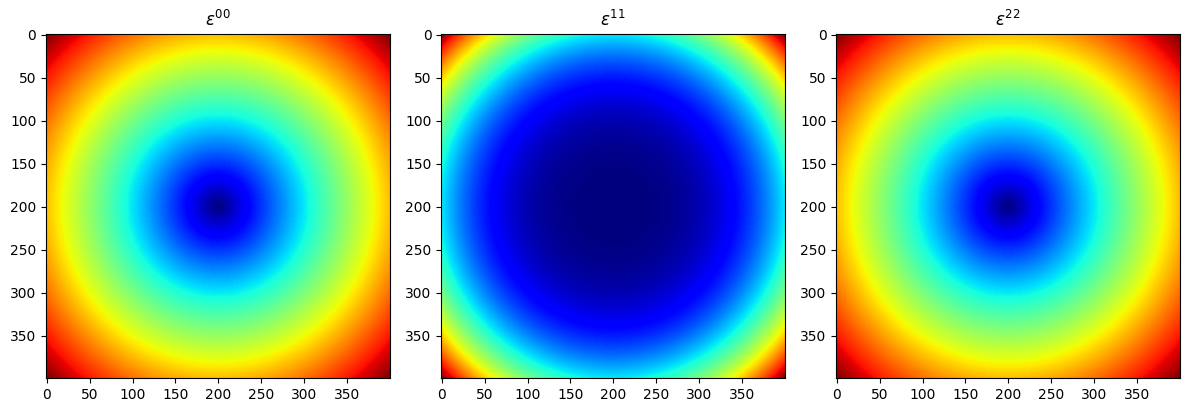

In [50]:
fig = plt.figure(figsize = (12,16))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(E00_intensity_map_crc,cmap='jet')
ax1.set_title(r'$\epsilon^{00}$')
ax2.imshow(E11_intensity_map_crc,cmap='jet')
ax2.set_title(r'$\epsilon^{11}$')
ax3.imshow(E22_intensity_map_crc,cmap='jet')
ax3.set_title(r'$\epsilon^{22}$')


plt.tight_layout()

All seems weird, try the provided metric

$\mu^{ij} = \epsilon^{ij} = \sqrt{g} g^{ij}$

In [51]:
g_prov = sympy.Matrix([[1/(1-(sympy.symbols('M')/r_smb)), 0, 0],
                       [0, r_smb**2, 0],
                       [0, 0, r_smb**2 * sympy.sin(theta_smb)]])

g_prov_det = sympy.simplify(sympy.det(sympy.Inverse(g_prov)))


In [52]:
display(Math(r'[g_{ij}] = '+ sympy.latex(g_prov)))
display(Math(r'[g^{ij}] = '+ sympy.latex(sympy.Inverse(g_prov))))
display(Math(r'\sqrt{g} = '+ sympy.latex(sympy.sqrt(g_prov_det))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [53]:
Eij_prov = sympy.sqrt(g_prov_det)*sympy.Inverse(g_prov)

Eij_prov00 = sympy.simplify(Eij_prov[0,0])
Eij_prov11 = sympy.simplify(Eij_prov[1,1])
Eij_prov22 = sympy.simplify(Eij_prov[2,2])

In [54]:
display(Math(r'\epsilon^{00} = '+ sympy.latex(Eij_prov00)))
display(Math(r'\epsilon^{11} = '+ sympy.latex(Eij_prov11)))
display(Math(r'\epsilon^{22} = '+ sympy.latex(Eij_prov22)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [55]:
Eij_prov00 = Eij_prov00.subs(r_smb, r)
Eij_prov11 = Eij_prov11.subs(r_smb, r)
Eij_prov22 = Eij_prov22.subs(r_smb, r)

Eij_prov00 = Eij_prov00.subs(theta_smb, theta)
Eij_prov11 = Eij_prov11.subs(theta_smb, theta)
Eij_prov22 = Eij_prov22.subs(theta_smb, theta)

display(Math(r'\epsilon^{00} = '+ sympy.latex(sympy.simplify(Eij_prov00))))
display(Math(r'\epsilon^{11} = '+ sympy.latex(sympy.simplify(Eij_prov11))))
display(Math(r'\epsilon^{22} = '+ sympy.latex(sympy.simplify(Eij_prov22))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [59]:
x, y = np.meshgrid(g, g)
z = 0
M=1

In [60]:
E00_intensityy = eval(str(Eij_prov00))
E11_intensityy = eval(str(Eij_prov11))
E22_intensityy = eval(str(Eij_prov22))

<string>:1: RuntimeWarning: divide by zero encountered in divide
<string>:1: RuntimeWarning: invalid value encountered in multiply
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in sqrt


In [61]:
E00_intensityy

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

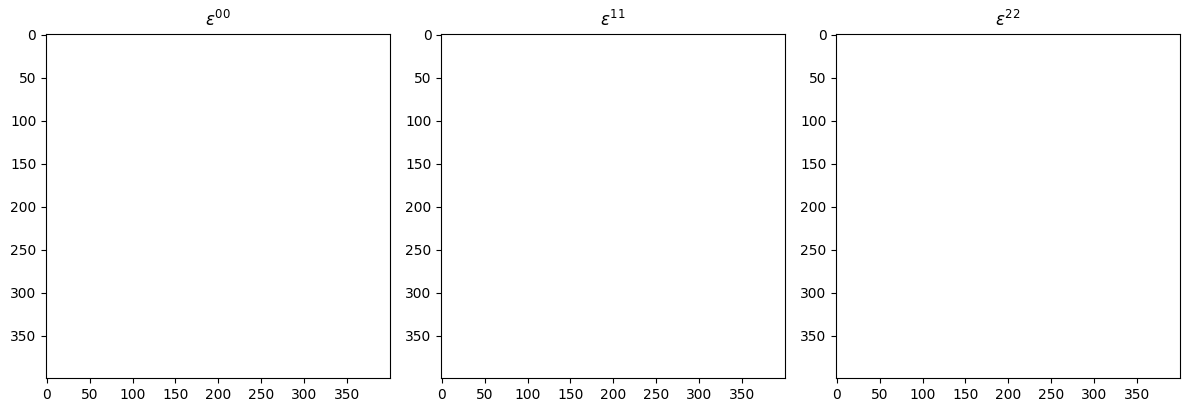

In [62]:
fig = plt.figure(figsize = (12,16))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(E00_intensityy,cmap='jet')
ax1.set_title(r'$\epsilon^{00}$')
ax2.imshow(E11_intensityy,cmap='jet')
ax2.set_title(r'$\epsilon^{11}$')
ax3.imshow(E22_intensityy,cmap='jet')
ax3.set_title(r'$\epsilon^{22}$')

plt.tight_layout()